In [44]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import pdb
%config InlineBackend.figure_formats = ['svg']

## Thermal detector

In [116]:
def det(t, T, C, Gb, Tb, G, P, t0):
    
    dT = P(t, t0)  # heat input
    dT += Gb * (Tb - T)  # coupling to temperature bath
    dT += np.dot(G, T)  # heat transfer from other components
    dT -= np.dot(np.diag(np.dot(G, np.ones(T.shape[0]))),T)  # heat transfer to other components
    dT /= C  # heat to temperature

    return dT

In [117]:
C = np.array([0.1, 
              10.,
              50.])  # heat capacity, pJ/mK
Gb = np.array([100., 
               0.,
               100.]) # heat cond to bath, pW/mK
Tb = 15.  # temp bath, mK
Gab = 10.
Gbc = 1.
G = np.array([[0., Gab, 0.], 
              [Gab, 0., Gbc], 
              [0., Gbc, 0.], ])  # heat cond between components, pW/mK
lamb = 0.01  # thermalization time, s
eps = 0.05  # share in thermometer
eps_ = np.array([eps, 
                 2*eps, 
                 (1-3*eps)])
t0 = 0.1  # onset time, s

def P(x, t0):
    if t0 < x:
        retv = eps_*np.exp(-(x-t0)/lamb) 
    else:
        retv = np.zeros(eps_.shape)
    return retv  # pW

t = np.linspace(0,1,10000)  # s

T0 = Tb * np.ones(C.shape[0])  # mK

In [118]:
%time T = odeint(det, T0, t, args=(C, Gb, Tb, G, P, t0), tfirst=True)

CPU times: user 12 ms, sys: 4.95 ms, total: 16.9 ms
Wall time: 12.7 ms


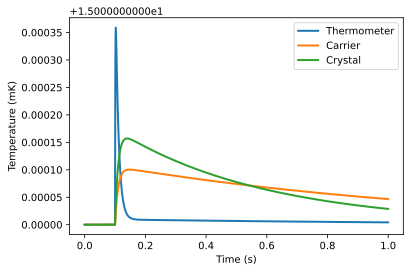

In [119]:
plt.plot(t, T[:, 0], label='Thermometer', c='C0', linewidth=2)
plt.plot(t, T[:, 1], label='Carrier', c='C1', linewidth=2)
plt.plot(t, T[:, 2], label='Crystal', c='C2', linewidth=2)
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Temperature (mK)')
plt.show()

## Temperature dependent couplings and capacities

In [120]:
def det_(t, T, C, Gb, Tb, G, P, t0, a, b):
    
    dT = P(t, t0)  # heat input
    dT += (Gb + a*T**4) * (Tb - T)  # coupling to temperature bath
    dT += np.dot((G + a*T**3), T)  # heat transfer from other components
    dT -= np.dot(np.diag(np.dot((G + a*T**3), np.ones(T.shape[0]))),T)  # heat transfer to other components
    dT /= (C + b*T**3)  # heat to temperature

    return dT

In [128]:
a = 0.1  # couplings
b = 0.1  # capacities

%time T = odeint(det_, T0, t, args=(C, Gb, Tb, G, P, t0, a, b), tfirst=True)

CPU times: user 9.23 ms, sys: 4.13 ms, total: 13.4 ms
Wall time: 9.91 ms


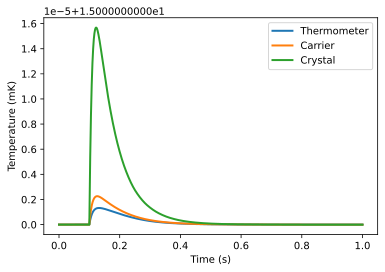

In [129]:
plt.plot(t, T[:, 0], label='Thermometer', c='C0', linewidth=2)
plt.plot(t, T[:, 1], label='Carrier', c='C1', linewidth=2)
plt.plot(t, T[:, 2], label='Crystal', c='C2', linewidth=2)
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Temperature (mK)')
plt.show()